In [ ]:
!wget "https://github.com/ausungju/human_learning/raw/main/trash_new.npy" -O trash.npy
!wget "https://github.com/ausungju/human_learning/raw/main/target_new.npy" -O target.npy

--2023-06-05 05:56:22--  https://github.com/ausungju/human_learning/raw/main/trash_new.npy
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ausungju/human_learning/main/trash_new.npy [following]
--2023-06-05 05:56:22--  https://media.githubusercontent.com/media/ausungju/human_learning/main/trash_new.npy
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139200128 (133M) [application/octet-stream]
Saving to: ‘trash.npy’

trash.npy           100%[===================>] 132.75M   362MB/s    in 0.4s    

2023-06-05 05:56:28 (362 MB/s) - ‘trash.npy’ saved [139200128/139200128]

--2023-06-0

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

#저장해둔 trash.npy와 target 데이터를 불러오기 
trash = np.load("trash.npy")
target = np.load("target.npy")

In [ ]:
trash.astype(np.uint8)

#표준화
input_scaler = trash /255.0

#훈련가능하게 데이터변환
dataset_size = input_scaler.shape[0]
input_2d = input_scaler.reshape(dataset_size,-1)

from sklearn.decomposition import PCA

pca = PCA(n_components = 500)
pca.fit(input_2d)
input_pca = pca.transform(input_2d)
print(input_pca.shape)

(18560, 500)


In [ ]:
sum(pca.explained_variance_ratio_)

0.7748179717508213

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

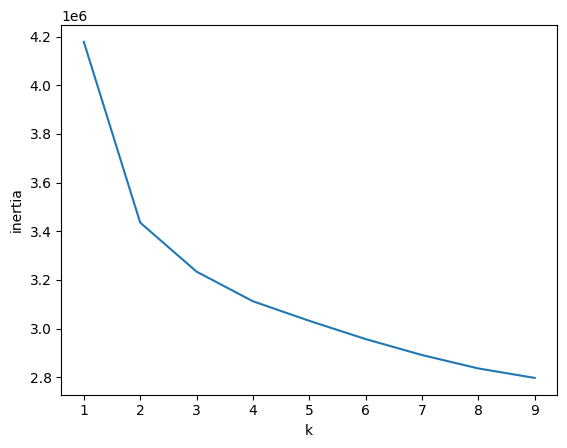

In [ ]:
#최적의 K값 찾기
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 10):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(input_pca)
  inertia.append(km.inertia_)

plt.plot(range(1,10),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 6, random_state = 42)
km.fit(input_pca)
print(np.unique(km.labels_,return_counts=True))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3, 4, 5], dtype=int32), array([3397, 3398, 2742, 2184, 2607, 4232]))


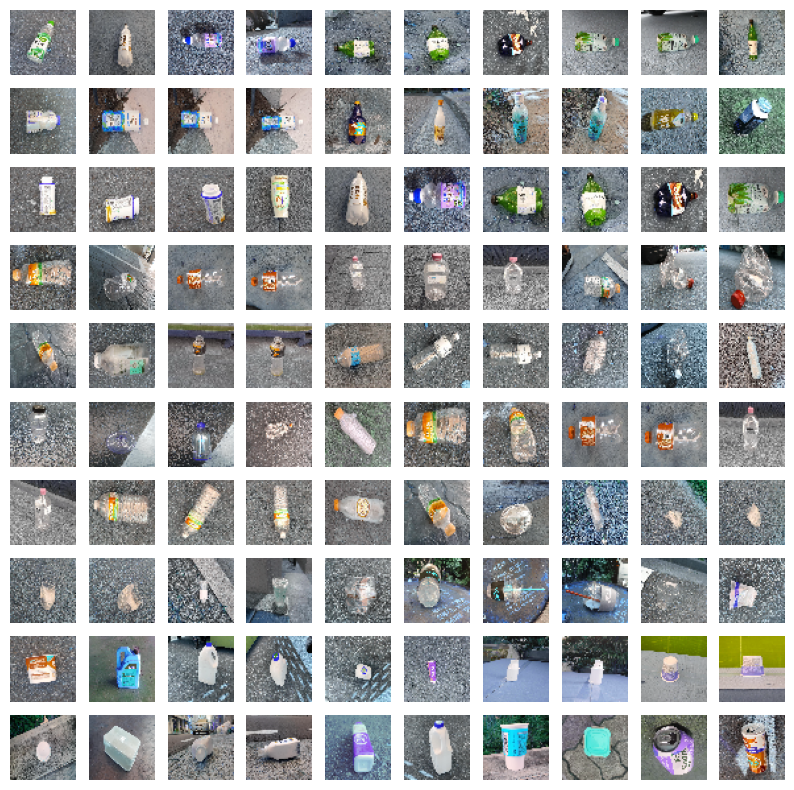

In [ ]:
index = [trash[(km.labels_==0)]]
index = np.array(index)
index = index.reshape(-1, 50,50,3)

plt.figure(figsize=(10, 10))
for i in range(100):
  ax = plt.subplot(10, 10, i + 1)
  plt.imshow(index[i], cmap = 'gray_r')
  plt.axis("off")
plt.show()

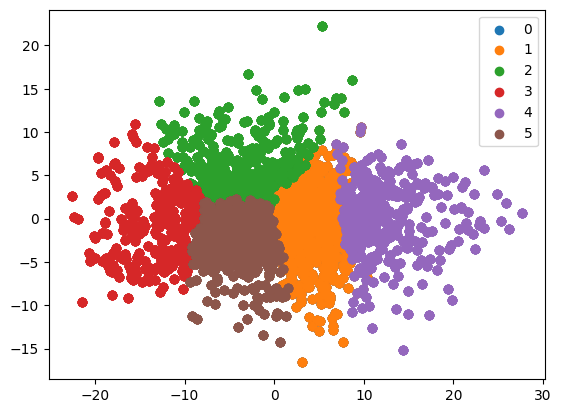

In [ ]:
for label in range(0,6):
    data = input_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend([0,1,2,3,4,5])
plt.show()

In [ ]:
from itertools import permutations

maxScore = 0;
maxScore_index = []
for a in permutations([0,1,2,3,4,5], 6):
    fuck = []

    for n in range(len(target)):
        fuck.append(a[target[n]])
    
    sum = 0;
    for i in range(len(target)):
        if fuck[i] == km.labels_[i]: sum += 1

    if ( max < sum/target.size ) : 
        max = sum/target.size
        max_indexing = a
print(max_indexing, max)

(0, 5, 1, 2, 4, 3) 0.23873922413793103


In [ ]:
maxScore_index, maxScore

((0, 5, 1, 2, 4, 3), 0.23873922413793103)